<a href="https://colab.research.google.com/github/malacosteus/MSAI/blob/main/ML/Lab1_part3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, optional part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline


from sklearn.model_selection import cross_val_score

Let's generate our dataset and take a look on it.

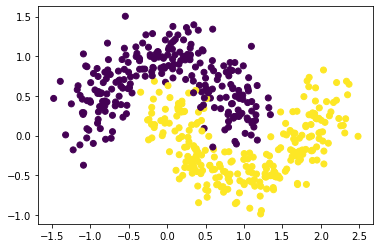

(325, 2) (325,) (175, 2) (175,)


In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE
def plot_decisions(dataset, clf, legend=""):
    data, label = dataset
    clf.fit(data, label)
    fig = plot_decision_regions(X=data, y=label, clf=clf, legend=2)
    plt.title(legend)
    plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


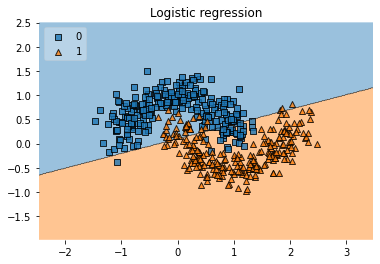

0.8742857142857143
0.8740554683411824


In [ ]:
plot_decisions((moons_points, moons_labels), lr, "Logistic regression")

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

As th expected we can't separate  effectively this classes with Logistic Regression ecause it can only do linear separation.


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


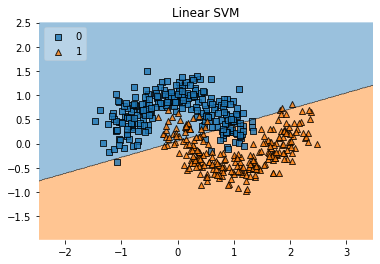

0.88
0.8795675675675677


In [ ]:
plot_decisions((moons_points, moons_labels), svm, "Linear SVM")

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

SVM can separate nonlinear data, but in order to do it we need to choose approritate kernel. Our kernel should transform our data into the space in which data would b linear separatable. Linear kernel can't do that.

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


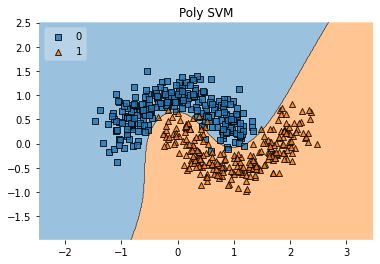

0.9657142857142857
0.9656806722689076


In [ ]:
svm = SVC(kernel='poly',coef0=1,C=5, degree=3) # here too
plot_decisions((moons_points, moons_labels), svm, "Poly SVM")

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

Classification quality increased significantly

Now we have nonlinear decisoon border.

We choose 5 degree polynomial as a compromise between quality and complexity of algorithm. 

We can use bigger polynomial and we could gain additional performance benefit but it would be very small. On the other side complexity of algorithms would significantly increase.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


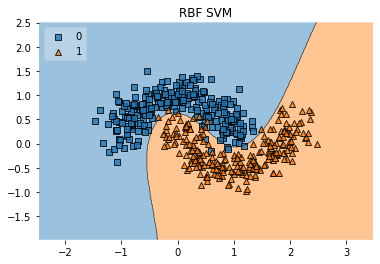

0.96
0.9599738638962396


In [ ]:
svm = SVC(kernel='rbf', gamma=0.1, C=1000) # here too
plot_decisions((moons_points, moons_labels), svm, "RBF SVM")

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

Classification quality increased significantly

Now we have nonlinear decisoon border.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


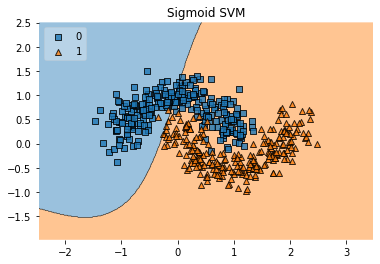

0.7085714285714285
0.6853567519306725


In [ ]:
svm = SVC(kernel='sigmoid', gamma=1, coef0=2,C=0.1) # here too
svm.fit(X_train, y_train)

plot_decisions((moons_points, moons_labels), svm, "Sigmoid SVM")

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

Classification quality decreased a little

Now we have nonlinear decisoon border.

We didn't found good hyperparameters for SVM with sigmoid kernel.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


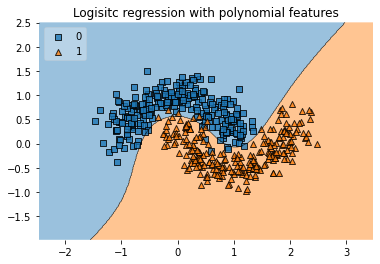

0.96
0.9599738638962396


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE

poly = PolynomialFeatures(5)
lr = LogisticRegression()
pipeline = Pipeline(steps=[("preprocessor", poly), ("classifier", lr)])

plot_decisions((moons_points, moons_labels), pipeline, "Logisitc regression with polynomial features")

y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

We can see that our result is very similar to RBF with appropriate kernels and hyperparameters in quality and border type.

We choose 5 degree polynomial as a compromise between quality and complexity of algorithm. 

We can use bigger polynomial and we could gain additional performance benefit but it would be very small. On the other side complexity of algorithms would significantly increase.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

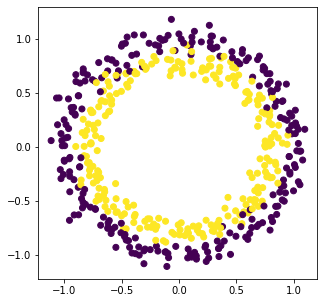

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

(650, 2) (650,) (350, 2) (350,)


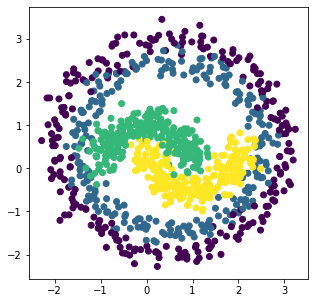

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


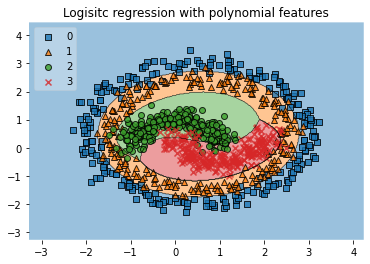

0.9028571428571428
0.9029050592626651


In [ ]:
### YOUR CODE HERE
poly = PolynomialFeatures(3)
lr = LogisticRegression(max_iter=500)
pipeline = Pipeline(steps=[("preprocessor", poly), ("classifier", lr)])

plot_decisions((points, labels), pipeline, "Logisitc regression with polynomial features")

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


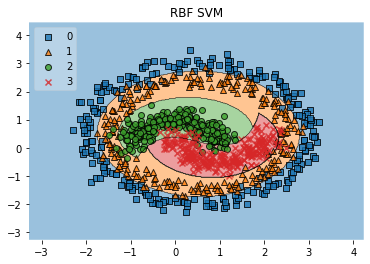

0.9028571428571428
0.9029050592626651


In [ ]:
svm = SVC(kernel='rbf')
plot_decisions((points, labels), svm, "RBF SVM")

svm.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

Additionally we can use gradient boosting in order to solve this problem. But SVM with rbf kernel already can separate our classes. So we don't have a reason to additionaly try gradient boosting as it will require more computational resources compared to SVM. 

We can try random forest to solve this problem, but I often prefer SVM if we found appropriate kernel.